In [13]:
import sys; sys.path.append("../../")
import pandas as pd
import matplotlib.pyplot as plt
from DataPreprocessing.DataPreprocessing import *
from utils import *
from CorrelationAnalysis import *
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze Installs


## Question 1
    Is there certain app category have highest installs? does category affect installs? 

## Read Data

In [2]:
# read data as dataframe from csv file
df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
print(df.shape)

C:\Users\dell\AppData\Local\Temp\ipykernel_21512\377713779.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
b'Skipping line 78700: expected 20 fields, saw 21\nSkipping line 85033: expected 20 fields, saw 21\n'
b'Skipping line 128092: expected 20 fields, saw 22\n'
b'Skipping line 197000: expected 20 fields, saw 21\nSkipping line 218421: expected 20 fields, saw 21\n'
b'Skipping line 330474: expected 20 fields, saw 21\nSkipping line 337681: expected 20 fields, saw 21\n'
b'Skipping line 556266: expected 20 fields, saw 21\n'
b'Skipping line 641092: expected 20 fields, saw 21\n'
b'Skipping line 759119: expected 20 fields, saw 21\n'
b'Skipping line 801997: expected 20 fields, saw 22\n'
b'Skipping line 823248: expected 20 fields, saw 21\n'
b'Skipping line 1044981: expected 20 fields, saw 21\n'
b'Skipping line 1138871: e

(1900333, 20)


In [3]:
df.head()


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10+,10,15,True,0.0,10000000,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,"5,000+",5000,7662,True,0.0,2.9000000,5.0 and up,Webserveis,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0.0,3.7000000,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5,10+,10,19,True,0.0,1.8000000,4.0.3 and up,Climate Smart Tech2,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0,100+,100,478,True,0.0,6.2000000,4.1 and up,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


## Clean

In [4]:
df = convert_to_numeric(df)
df=convert_binary(df)
df.head(10)

../..\DataPreprocessing\DataPreprocessing.py:223: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
../..\DataPreprocessing\DataPreprocessing.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace('True', '1')
../..\DataPreprocessing\DataPreprocessing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
510791,Sunset Wallpapers HD,com.GarudaJogja.Sunset.WallpapersHD,Personalization,0.0,0,10.0,10,44,1,0.0,0.000005,4.1,Garuda Jogja,hikmatfisah@gmail.com,"Nov 27, 2020","Apr 14, 2021",Everyone,1,0,0
969373,Vraj Infra,com.easternts.vrajinfra,Business,0.0,0,500.0,500,632,1,0.0,0.000004,4.1,Eastern Techno Solutions,contact@easternts.com,"Jun 16, 2015","Dec 19, 2017",Everyone,0,0,0
157505,HNS Elite CRM,com.mobisoftseo.hnsapp,Business,0.0,0,100.0,100,370,1,0.0,0.000005,4.2,Mobisoftseo Technologies,yogesh@mobisoftseo.com,"Dec 18, 2018","Feb 05, 2019",Everyone,0,0,0
1032217,Hits Radio UK,com.predicol.hitsradio,Music & Audio,0.0,0,100.0,100,220,1,0.0,0.000009,4.2,Positive Apps and Games,positiveappsandgames@gmail.com,"Jun 2, 2020","Jun 02, 2020",Everyone,1,0,0
745439,Solo Empanadas,ie.flipdish.fd3403,Lifestyle,0.0,0,100.0,100,201,1,0.0,20.000000,5.0,Flipdish,info@flipdish.com,"Jul 24, 2019","Oct 02, 2020",Everyone,0,0,0
888773,VCare Management System,daycareapp.vcaresys.com.daycareapp,House & Home,0.0,0,10.0,10,41,1,0.0,11.000000,4.1,ClientServer Technology Solutions,cstechinc2018@gmail.com,"Apr 16, 2019","Dec 16, 2019",Everyone,1,0,0
1377599,Upoznaj Inđiju,rs.travel.indjija,Education,5.0,8,50.0,50,75,1,0.0,86.000000,5.0,Indjija Travel,office@indjijatravel.rs,"May 25, 2021","Jun 09, 2021",Everyone,0,0,0
1465405,7 Types of Asian Noodles,com.blogspot.zikoabdel.noodles,Food & Drink,0.0,0,10.0,10,21,1,0.0,0.000009,4.1,Z-Doird,ettoumari@gmail.com,"Oct 21, 2018","Oct 21, 2018",Everyone,1,0,0
32145,La Noción,es.lanocion.lanocion,News & Magazines,4.0,11,5000.0,5000,7008,1,0.0,0.000007,4.4,La Noción,contacto@lanocion.es,"Apr 29, 2019","May 10, 2021",Everyone,1,0,0
1094294,BOLÃO BRASÍLIA,br.com.vilaleopoldo.bolaobrasilia,Entertainment,4.5,15,1000.0,1000,1952,1,0.0,0.000003,4.0.3,LUCIANO VILAS BOAS NEVES DE SOUZA,neveluciano@gmail.com,"Jun 19, 2017","May 28, 2018",Everyone,0,0,0


In [18]:
df_cat_avg_installs = df.groupby(['Category'], group_keys=True).apply(lambda x: x)
df_cat_avg_installs.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
510791,Sunset Wallpapers HD,com.GarudaJogja.Sunset.WallpapersHD,Personalization,0.0,0,10.0,10,44,1,0.0,0.000005,4.1,Garuda Jogja,hikmatfisah@gmail.com,"Nov 27, 2020","Apr 14, 2021",Everyone,1,0,0
969373,Vraj Infra,com.easternts.vrajinfra,Business,0.0,0,500.0,500,632,1,0.0,0.000004,4.1,Eastern Techno Solutions,contact@easternts.com,"Jun 16, 2015","Dec 19, 2017",Everyone,0,0,0
157505,HNS Elite CRM,com.mobisoftseo.hnsapp,Business,0.0,0,100.0,100,370,1,0.0,0.000005,4.2,Mobisoftseo Technologies,yogesh@mobisoftseo.com,"Dec 18, 2018","Feb 05, 2019",Everyone,0,0,0
1032217,Hits Radio UK,com.predicol.hitsradio,Music & Audio,0.0,0,100.0,100,220,1,0.0,0.000009,4.2,Positive Apps and Games,positiveappsandgames@gmail.com,"Jun 2, 2020","Jun 02, 2020",Everyone,1,0,0
745439,Solo Empanadas,ie.flipdish.fd3403,Lifestyle,0.0,0,100.0,100,201,1,0.0,20.000000,5.0,Flipdish,info@flipdish.com,"Jul 24, 2019","Oct 02, 2020",Everyone,0,0,0


In [20]:

Installs = df.Installs.mean()

df_cat_avg_installs = df.groupby(['Category'])['Installs'].mean()

df_cat_avg_installs.head()

Category
Action             1665.561564
Adventure          1814.438662
Arcade              963.350271
Art & Design       1659.842389
Auto & Vehicles    1506.340281
Name: Installs, dtype: float64

## Select Interesting  Variables

In [5]:
features_df = df[[ 'Installs', 'Size', 'Category','Minimum Android']]
print(features_df.shape)

(285048, 4)


In [7]:
features_df.head(10)

,Installs,Size,Category,Minimum Android
510791,10.0,0.000005,Personalization,4.1
969373,500.0,0.000004,Business,4.1
157505,100.0,0.000005,Business,4.2
1032217,100.0,0.000009,Music & Audio,4.2
745439,100.0,20.000000,Lifestyle,5.0
888773,10.0,11.000000,House & Home,4.1
1377599,50.0,86.000000,Education,5.0
1465405,10.0,0.000009,Food & Drink,4.1
32145,5000.0,0.000007,News & Magazines,4.4
1094294,1000.0,0.000003,Entertainment,4.0.3


## Installs values distribution
   

Text(0.5, 1.0, 'Average Installs per Category')

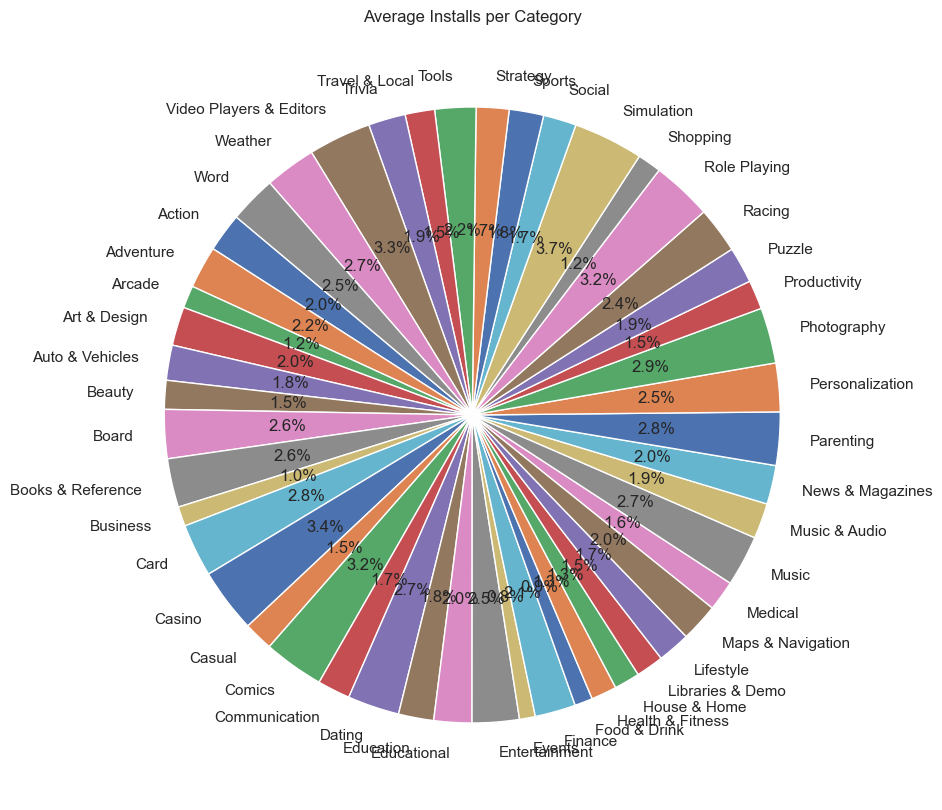

In [22]:
# plot pie chart for installs values
plt.figure(figsize=(10,10))
plt.pie(df_cat_avg_installs, labels=df_cat_avg_installs.index, autopct='%1.1f%%',  startangle=140)
plt.title('Average Installs per Category')


<Axes: xlabel='Category'>

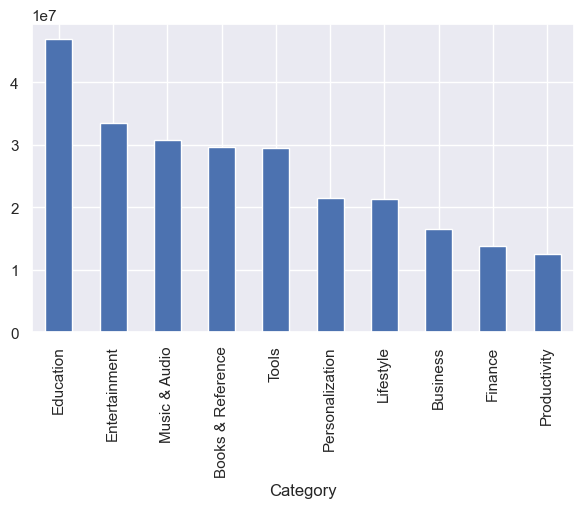

In [38]:
#get unique values of content rating
df_cat_avg_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
df_cat_avg_installs.nlargest(15).plot(kind='bar', figsize=(7, 4))

### Results:
    there's no significance difference between average number of installs
    for each category

### Mean of app installs for ad supported/ not supported

Text(0, 0.5, 'Installs')

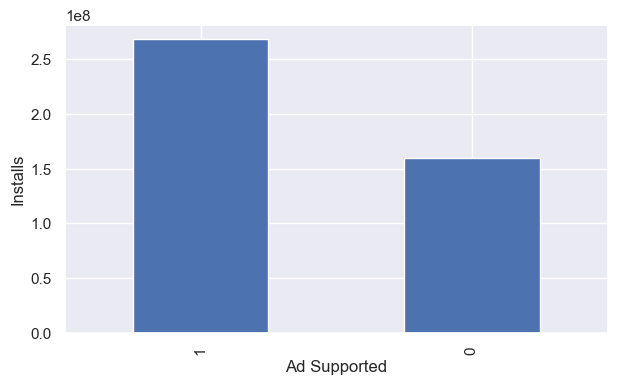

In [39]:
#get unique values of content rating
app_rating = df.groupby('Ad Supported')['Installs'].sum().sort_values(ascending=False).head(10)
app_rating.nlargest(15).plot(kind='bar', figsize=(7, 4))
plt.ylabel('Installs')


In [43]:
ANOVA_test(df, 'Ad Supported', 'Rating')

P-value:  0.0


## Question 2
    Is there a relation between size and installs?

Text(0, 0.5, 'Installs')

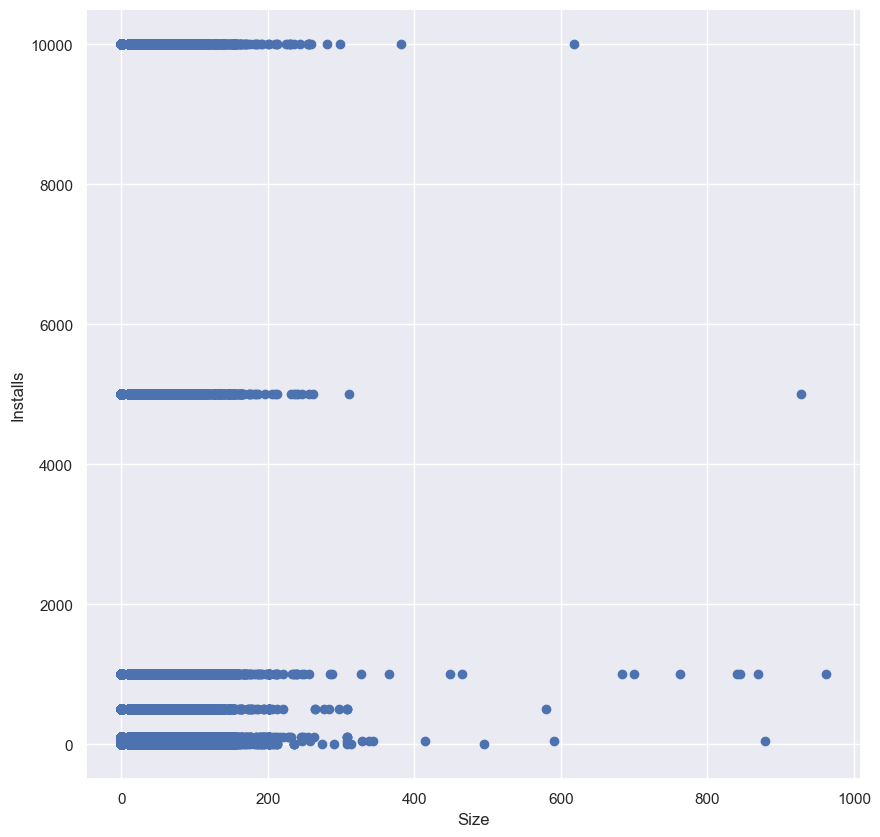

In [28]:
#scatter size vs installs
plt.figure(figsize=(10,10))
plt.scatter(df['Size'], df['Installs'])
plt.xlabel('Size')
plt.ylabel('Installs')



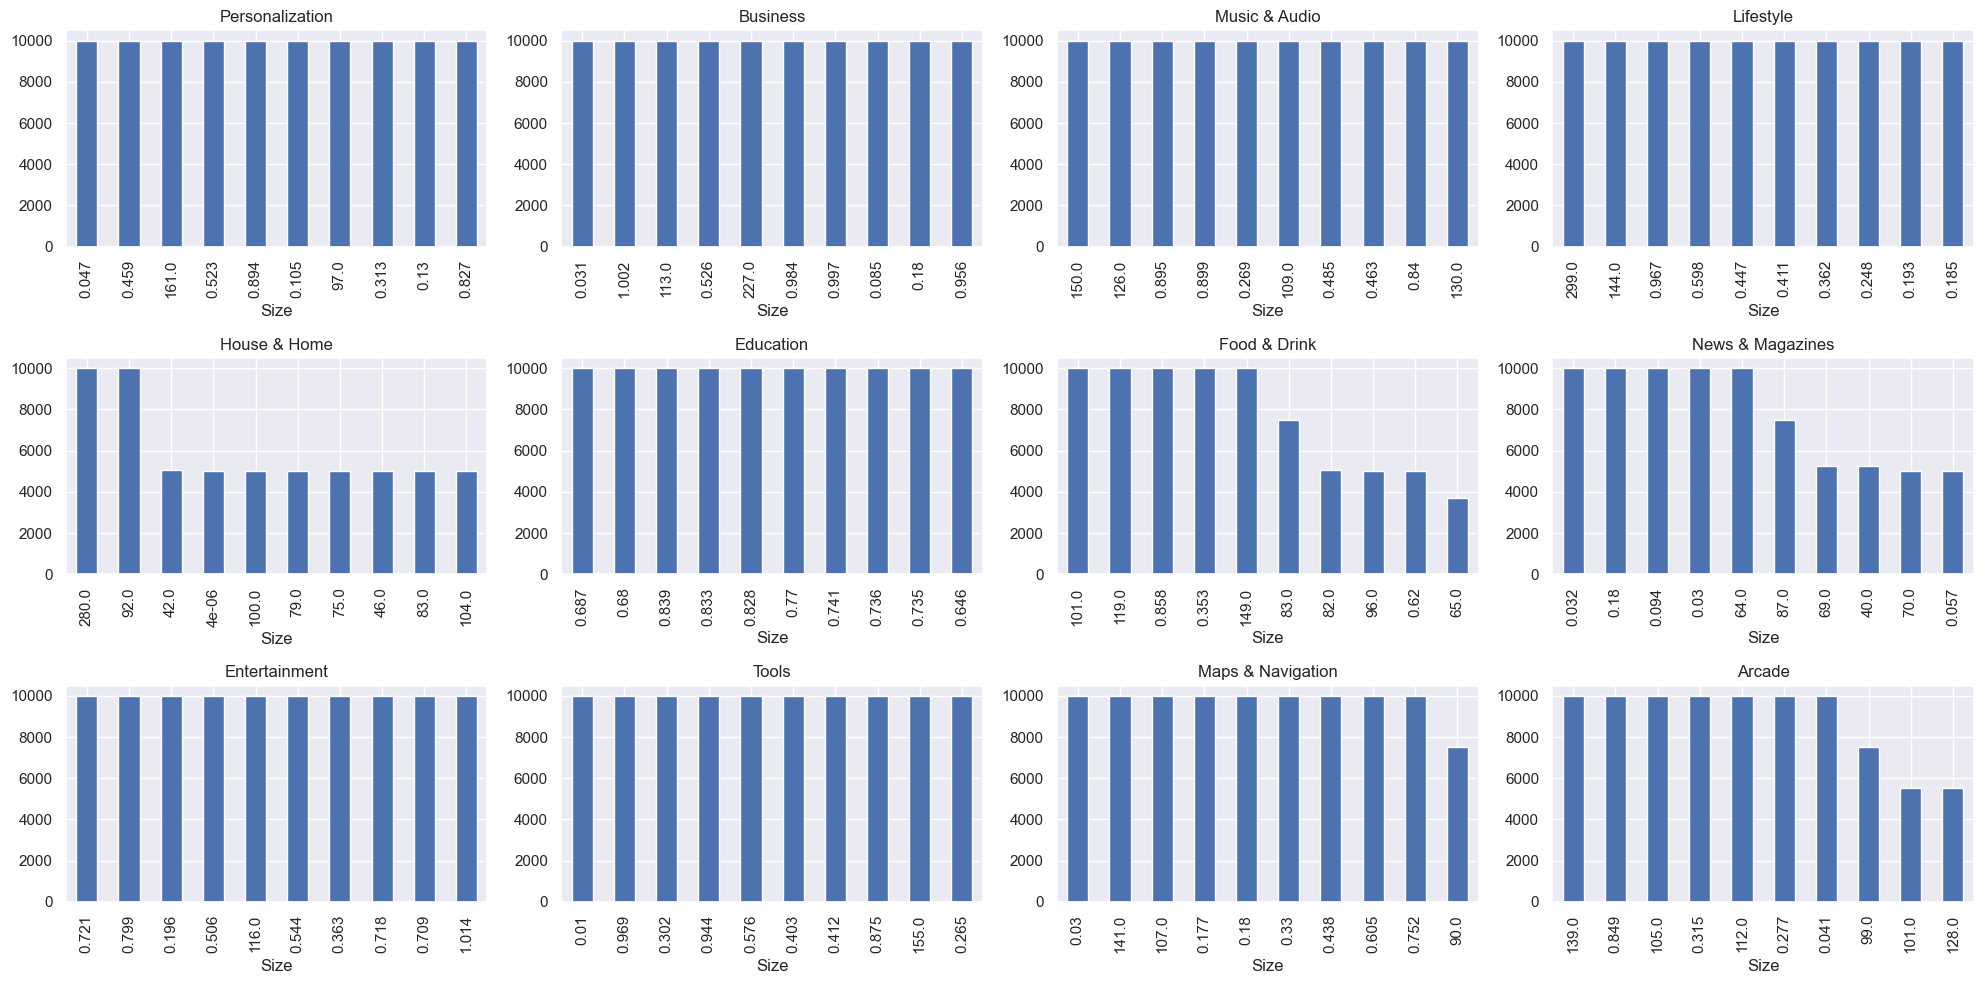

In [27]:
sub_blot(df, "Category", "Size", "Installs", "Mean Ratings by Last Updated for each category")

## Question 3
    Is there a relation between install and minimum android version?

In [30]:
# print unique values of Minimum Android
# combine version based on first two digits
df['Minimum Android'] = df['Minimum Android'].str[:3]
print("Unique values in Minimum Android: ", df['Minimum Android'].unique())
#p

Unique values in Minimum Android:  ['4.1' '4.2' '5.0' '4.4' '4.0' '2.2' '6.0' '4.3' '2.3' '2.1' '7.0' '5.1'
 '8.0' '1.5' '3.0' '1.6' '2.0' '7.1' '0.0' '3.2' '3.1' '1.1' '1.0']


In [33]:
#print number of unique values in  column Minimum Android
print("Number of unique values in Minimum Android: ", df['Minimum Android'].nunique())
#convert Minimum Android to numeric
df['Minimum Android'] = pd.to_numeric(df['Minimum Android'], errors='coerce')

Number of unique values in Minimum Android:  23


<Axes: xlabel='Minimum Android'>

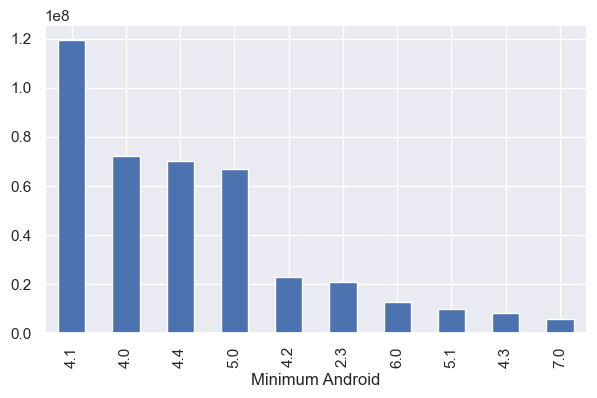

In [36]:
content_rating = df.groupby('Minimum Android')['Installs'].sum().sort_values(ascending=False).head(10)
content_rating.nlargest(15).plot(kind='bar', figsize=(7, 4))



<Axes: title={'center': 'Mean Rating for each content rating'}, xlabel='Content Rating'>

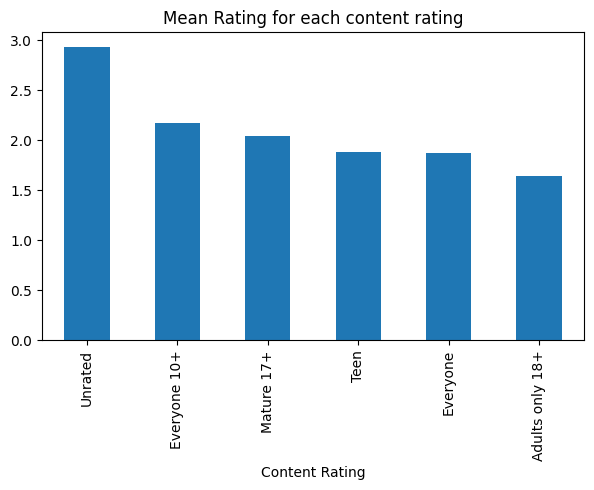

In [20]:
#get unique values of content rating
content_rating = df.groupby('Content Rating')['Rating'].mean().sort_values(ascending=False).head(10)
content_rating.nlargest(15).plot(kind='bar', figsize=(7, 4), title='Mean Rating for each content rating')


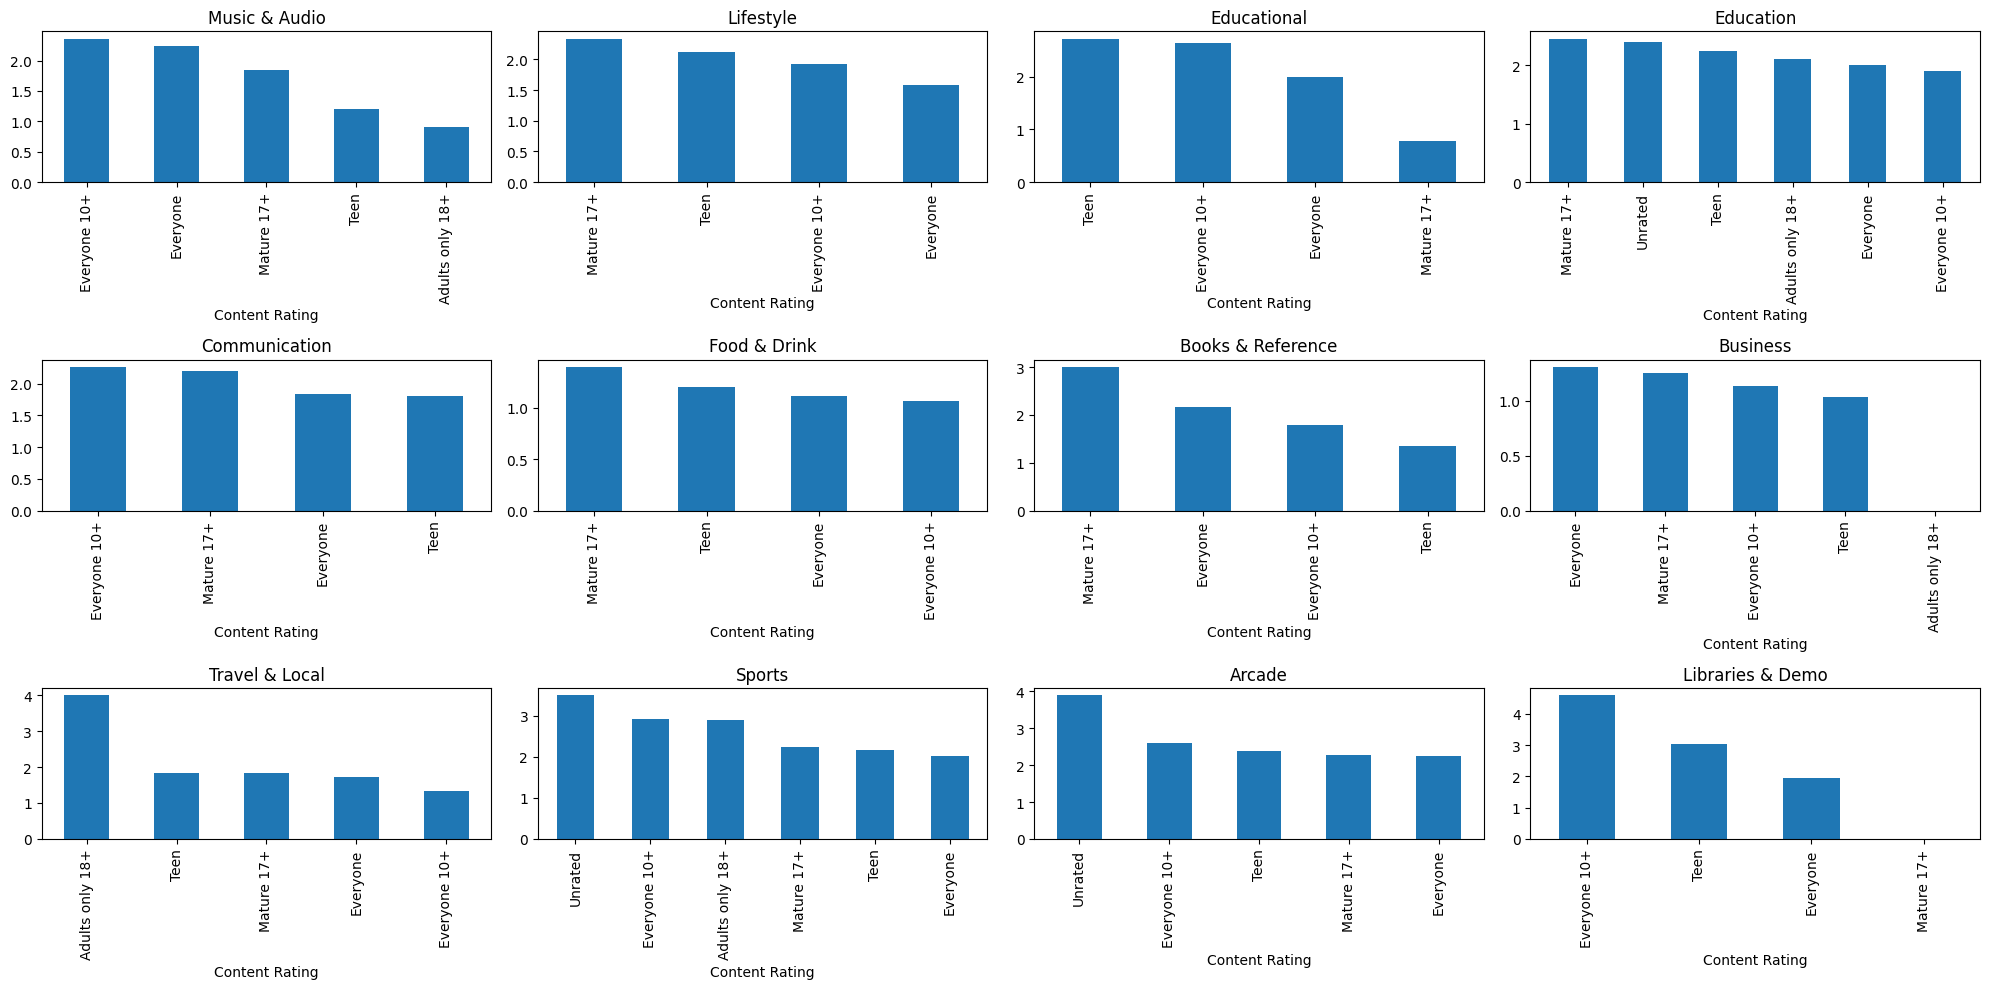

In [17]:
sub_blot(df, "Category", "Content Rating", "Rating", "Mean Ratings by Content Rating for each category")

## Results
- 
